In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

In [ ]:
data = pd.read_csv('tesla.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,29-06-2010,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,30-06-2010,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,01-07-2010,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,02-07-2010,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,06-07-2010,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2193 entries, 0 to 2192
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2193 non-null   object 
 1   Open       2193 non-null   float64
 2   High       2193 non-null   float64
 3   Low        2193 non-null   float64
 4   Close      2193 non-null   float64
 5   Adj Close  2193 non-null   float64
 6   Volume     2193 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 120.1+ KB


In [ ]:
data["Close"]=pd.to_numeric(data.Close,errors='coerce')
data = data.dropna()
trainData = data.iloc[:,4:5].values

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2193 entries, 0 to 2192
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2193 non-null   object 
 1   Open       2193 non-null   float64
 2   High       2193 non-null   float64
 3   Low        2193 non-null   float64
 4   Close      2193 non-null   float64
 5   Adj Close  2193 non-null   float64
 6   Volume     2193 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 137.1+ KB


In [ ]:
sc = MinMaxScaler(feature_range=(0,1))
trainData = sc.fit_transform(trainData)
trainData.shape

(2193, 1)

In [ ]:
X_train = []
y_train = []

for i in range (60,1149): #60 : timestep // 1149 : length of the data
    X_train.append(trainData[i-60:i,0]) 
    y_train.append(trainData[i,0])

X_train,y_train = np.array(X_train),np.array(y_train)

In [ ]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1)) #adding the batch_size axis
X_train.shape

(1089, 60, 1)

In [ ]:
model = Sequential()

model.add(LSTM(units=100, return_sequences = True, input_shape =(X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = False))
model.add(Dropout(0.2))

model.add(Dense(units =1))
model.compile(optimizer='adam',loss="mean_squared_error")

In [ ]:
hist = model.fit(X_train, y_train, epochs = 20, batch_size = 32, verbose=2)

Epoch 1/20
35/35 - 14s - loss: 0.0127 - 14s/epoch - 398ms/step
Epoch 2/20
35/35 - 7s - loss: 0.0020 - 7s/epoch - 188ms/step
Epoch 3/20
35/35 - 7s - loss: 0.0018 - 7s/epoch - 187ms/step
Epoch 4/20
35/35 - 7s - loss: 0.0025 - 7s/epoch - 187ms/step
Epoch 5/20
35/35 - 6s - loss: 0.0018 - 6s/epoch - 185ms/step
Epoch 6/20
35/35 - 6s - loss: 0.0016 - 6s/epoch - 185ms/step
Epoch 7/20
35/35 - 7s - loss: 0.0015 - 7s/epoch - 186ms/step
Epoch 8/20
35/35 - 6s - loss: 0.0017 - 6s/epoch - 184ms/step
Epoch 9/20
35/35 - 7s - loss: 0.0016 - 7s/epoch - 186ms/step
Epoch 10/20
35/35 - 6s - loss: 0.0015 - 6s/epoch - 186ms/step
Epoch 11/20
35/35 - 6s - loss: 0.0015 - 6s/epoch - 185ms/step
Epoch 12/20
35/35 - 6s - loss: 0.0013 - 6s/epoch - 185ms/step
Epoch 13/20
35/35 - 6s - loss: 0.0011 - 6s/epoch - 184ms/step
Epoch 14/20
35/35 - 6s - loss: 0.0011 - 6s/epoch - 184ms/step
Epoch 15/20
35/35 - 6s - loss: 0.0012 - 6s/epoch - 182ms/step
Epoch 16/20
35/35 - 6s - loss: 0.0012 - 6s/epoch - 184ms/step
Epoch 17/20
35/

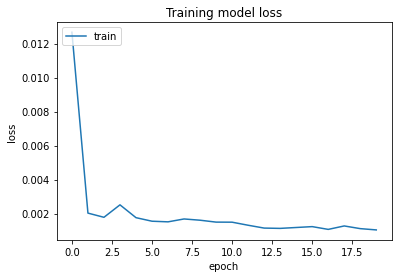

In [ ]:
plt.plot(hist.history['loss'])
plt.title('Training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [ ]:
testData = pd.read_csv('tesla.csv')
testData["Close"]=pd.to_numeric(testData.Close,errors='coerce')
testData = testData.dropna()
testData = testData.iloc[:,4:5]
y_test = testData.iloc[60:,0:].values 
#input array for the model
inputClosing = testData.iloc[:,0:].values 
inputClosing_scaled = sc.transform(inputClosing)
inputClosing_scaled.shape
X_test = []
length = len(testData)
timestep = 60
for i in range(timestep,length):  
    X_test.append(inputClosing_scaled[i-timestep:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape

(2133, 60, 1)

In [ ]:
y_pred = model.predict(X_test)
y_pred

67/67 [==============================] - 6s 60ms/step


array([[0.01445608],
       [0.01432305],
       [0.01407617],
       ...,
       [0.619914  ],
       [0.61583716],
       [0.61327845]], dtype=float32)

In [ ]:
predicted_price = sc.inverse_transform(y_pred)

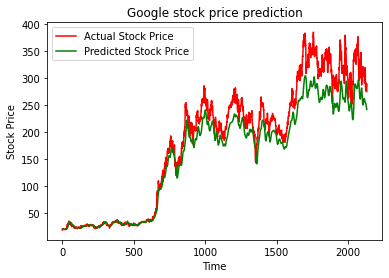

In [ ]:
plt.plot(y_test, color = 'red', label = 'Actual Stock Price')
plt.plot(predicted_price, color = 'green', label = 'Predicted Stock Price')
plt.title('Google stock price prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

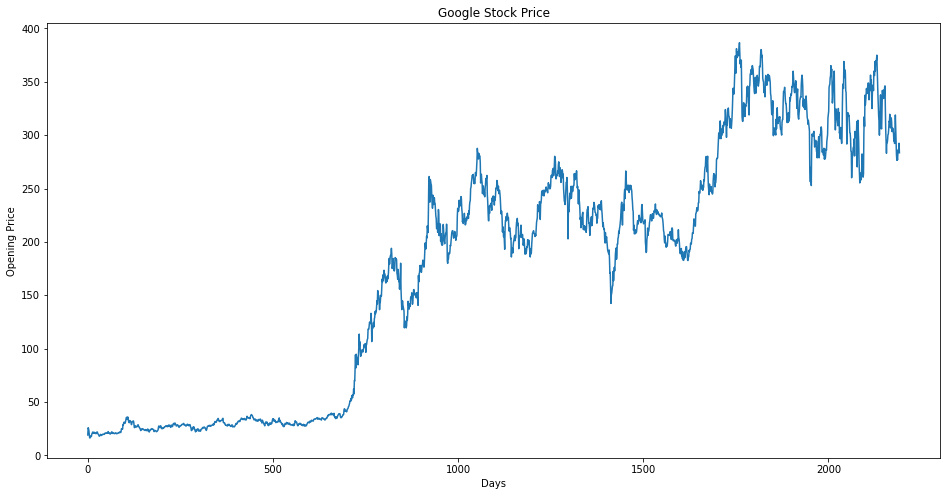

In [ ]:
# Visualizing the opening prices of the data.
plt.figure(figsize=(16,8))
plt.title('Google Stock Price')
plt.xlabel('Days')
plt.ylabel('Opening Price')
plt.plot(data['Open'])
plt.show()

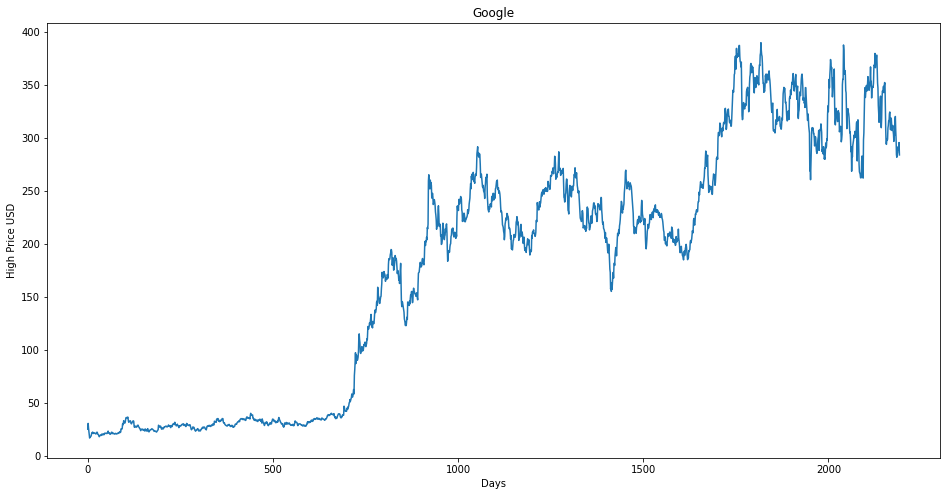

In [ ]:
# Visualizing the high prices of the data.
plt.figure(figsize=(16,8))
plt.title('Google')
plt.xlabel('Days')
plt.ylabel('High Price USD')
plt.plot(data['High'])
plt.show()

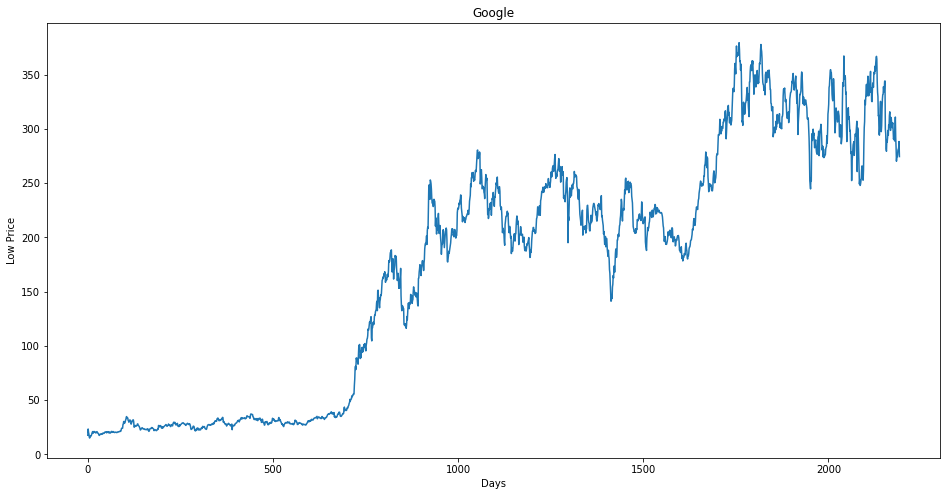

In [ ]:
# Visualizing the low prices of the data.
plt.figure(figsize=(16,8))
plt.title('Google')
plt.xlabel('Days')
plt.ylabel('Low Price')
plt.plot(data['Low'])
plt.show()

In [ ]:
df2 = data['Close']


In [ ]:
df2.tail()


2188    290.920013
2189    283.359985
2190    288.959991
2191    289.959991
2192    275.429993
Name: Close, dtype: float64

In [ ]:
df2 = pd.DataFrame(df2)     


In [ ]:
future_days = 100
df2['Prediction'] = df2['Close'].shift(-future_days)

In [ ]:
X = np.array(df2.drop(['Prediction'], 1))[:-future_days]
print(X)

[[ 23.889999]
 [ 23.83    ]
 [ 21.959999]
 ...
 [276.589996]
 [271.779999]
 [263.910004]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [ ]:
y = np.array(df2['Prediction'])[:-future_days]
print(y)


[ 29.889999  30.99      33.400002 ... 288.959991 289.959991 275.429993]


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

In [ ]:
# Implementing Linear and Decision Tree Regression Algorithms.
tree = DecisionTreeRegressor().fit(x_train, y_train)
lr = LinearRegression().fit(x_train, y_train)

In [ ]:
x_future = df2.drop(['Prediction'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


array([[291.720001],
       [284.730011],
       [291.820007],
       [296.73999 ],
       [291.130005],
       [319.5     ],
       [316.089996],
       [317.660004],
       [332.100006],
       [342.769989],
       [344.779999],
       [357.720001],
       [358.170013],
       [370.829987],
       [352.549988],
       [362.220001],
       [347.51001 ],
       [333.630005],
       [333.01001 ],
       [342.      ],
       [344.5     ],
       [349.929993],
       [342.950012],
       [335.070007],
       [310.859985],
       [309.160004],
       [308.899994],
       [318.51001 ],
       [322.470001],
       [318.959991],
       [316.709991],
       [318.869995],
       [310.100006],
       [322.690002],
       [323.850006],
       [320.230011],
       [313.579987],
       [303.200012],
       [297.429993],
       [308.73999 ],
       [306.649994],
       [297.179993],
       [290.170013],
       [298.140015],
       [300.839996],
       [349.540009],
       [348.170013],
       [341.9

In [ ]:
tree_prediction = tree.predict(x_future)
print(tree_prediction)

[260.       260.950012 260.       349.589996 314.859985 330.899994
 334.850006 329.899994 337.320007 362.220001 346.410004 341.399994
 341.059998 348.160004 312.600006 350.51001  331.279999 338.730011
 344.       348.440002 354.309998 353.470001 347.48999  334.645004
 325.829987 346.       343.920013 347.869995 341.170013 350.480011
 283.369995 359.700012 363.059998 357.970001 365.149994 366.76001
 366.600006 376.790009 332.970001 348.420013 337.029999 332.970001
 315.380005 319.769989 295.390015 326.089996 316.130005 333.869995
 332.799988 310.119995 300.359985 330.050003 334.959991 335.350006
 338.529999 344.970001 347.26001  334.399994 344.429993 346.049988
 347.309998 302.26001  298.920013 287.589996 291.51001  376.790009
 296.380005 297.459991 294.839996 316.049988 312.209991 312.890015
 321.350006 317.220001 307.51001  305.799988 319.880005 311.809998
 308.170013 303.769989 307.880005 305.640015 302.559998 346.
 294.709991 298.769989 297.859985 314.73999  319.880005 294.790009
 2

In [ ]:
lr_prediction = lr.predict(x_future)
print(lr_prediction)

[297.87512014 291.37435266 297.96812682 302.54376506 297.32641738
 323.71082439 320.53948321 321.99960789 335.42896838 345.35216978
 347.22150116 359.25584517 359.67436128 371.44827617 354.44767629
 363.44089461 349.76044138 336.85188426 336.2752821  344.63607155
 346.96109902 352.01105216 345.51959315 338.19110194 315.67551552
 314.09451452 313.85270236 322.79012281 326.47295794 323.20861008
 321.11608537 323.12491281 314.9687267  326.67756129 327.75637775
 324.38974264 318.20514726 308.55165649 303.18547543 313.70389688
 311.76017764 302.95297268 296.43361428 303.84580369 306.35681568
 351.64836275 350.37425142 344.62676214 379.57659078 370.99257916
 354.35469751 357.18191045 358.03753357 349.88134746 341.55773705
 338.54451076 310.69067059 313.42490475 325.94284517 325.70106184
 324.26883656 326.79846737 323.49691163 316.60552651 310.23497451
 308.5051392  307.11943213 295.29899995 287.6635893  287.85891206
 271.38839705 292.09045089 286.45458618 296.77771462 295.77328602
 301.11156

In [ ]:
predictions = tree_prediction 
valid = df2[X.shape[0]:]
valid['Predictions'] = predictions

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


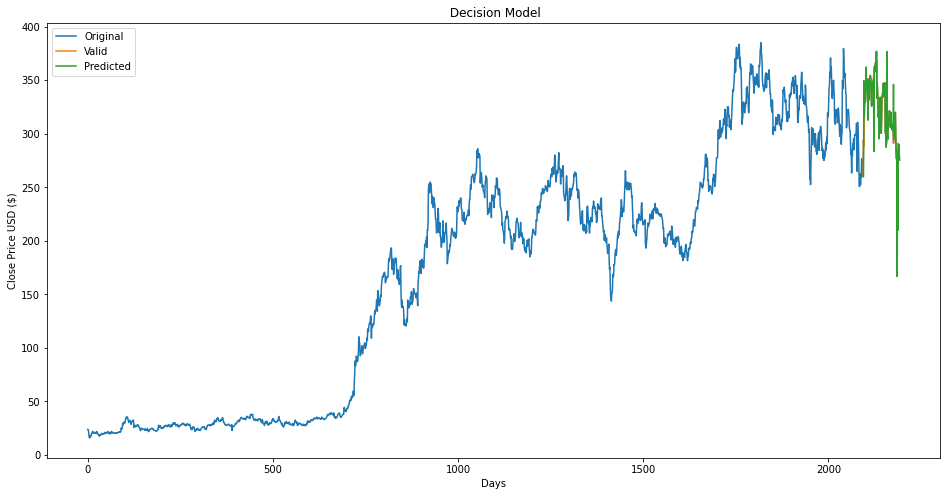

In [ ]:
plt.figure(figsize=(16,8))
plt.title(" Decision Model")
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df2['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(["Original", "Valid", 'Predicted'])
plt.show()

In [ ]:
predictions = lr_prediction 
valid = df2[X.shape[0]:]
valid['Predictions'] = predictions

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


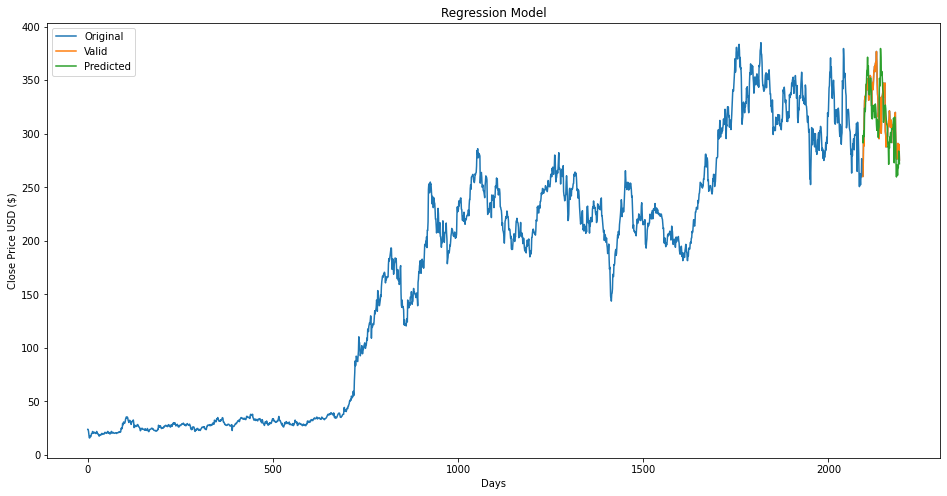

In [ ]:
plt.figure(figsize=(16,8))
plt.title("Regression Model")
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df2['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(["Original", "Valid", 'Predicted'])
plt.show()